Construct a Recurrent Neural Network (RNN) it includes key steps such as data preprocessing, model architecture design, and training to capture sequential dependencies in data

Data Preparation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
# Generate a synthetic time series (sine wave) for illustration
def create_time_series(n_steps):
    time = np.linspace(0, 100, n_steps)
    series = np.sin(time)
    return series

n_steps = 1000
series = create_time_series(n_steps)

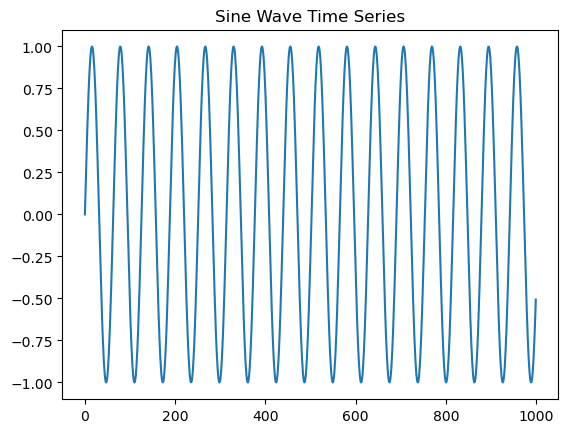

In [ ]:
# Plot the time series
plt.plot(series)
plt.title("Sine Wave Time Series")
plt.show()

In [ ]:
# Prepare the data for RNN input
def create_sequences(data, n_steps):
    sequences = []
    labels = []
    for i in range(len(data) - n_steps):
        sequence = data[i:i + n_steps]
        label = data[i + n_steps]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Define time window for input sequences
n_input_steps = 50

In [ ]:
# Normalize the data to range (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(series.reshape(-1, 1))

# Create sequences and labels
X, y = create_sequences(scaled_series, n_input_steps)

# Reshape input to 3D for RNN: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Design the RNN Model

Design the RNN Model

In [ ]:
# RNN Model Design
model = Sequential()

# Add SimpleRNN layer with 50 units
model.add(SimpleRNN(50, activation='relu', input_shape=(n_input_steps, 1)))

# Add a Dense output layer to predict the next value
model.add(Dense(1))

# Compile the model using Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse')

# Print the model architecture
model.summary()


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Train the RNN Model

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.3155 - val_loss: 0.0418
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0216 - val_loss: 0.0076
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0056 - val_loss: 0.0014
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.2912e-04 - val_loss: 8.9955e-05
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.8358e-05 - val_loss: 1.9635e-05
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.0989e-05 - val_loss: 2.7044e-06
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.9069e-06 - val_loss: 2.7941e-06
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.3786e-06 - val_loss: 2.9083e-06
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.1755e-06 - val_loss: 1.8830e-06
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.8856e-06 - val_loss: 1.7430e-06
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.6192e-06 - val_loss: 1.9450e-06

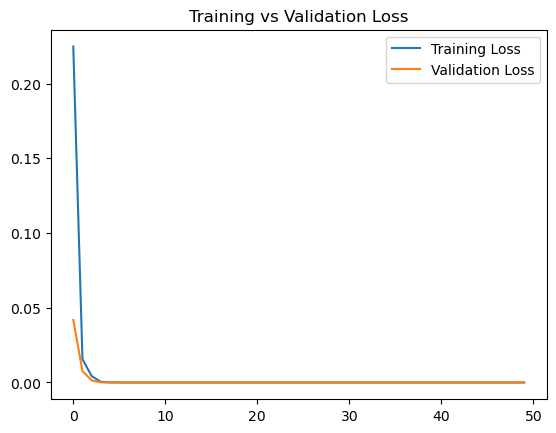

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


Model Evaluation and Prediction

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step


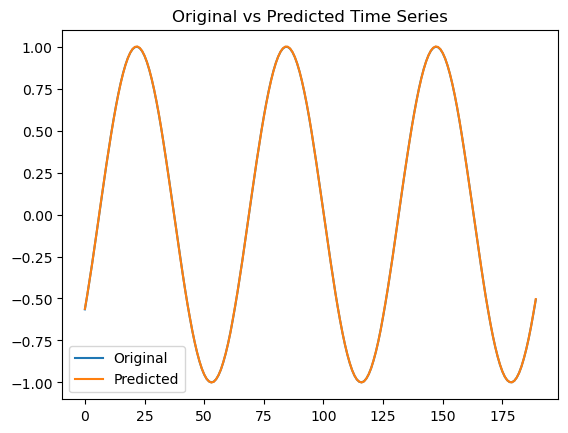

In [ ]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Inverse transform the predictions back to the original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original vs predicted time series
plt.plot(y_test_rescaled, label='Original')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.title("Original vs Predicted Time Series")
plt.show()
